Title: DoWhy: Titanic Example
Description: Using DoWhy for causal inference



In [2]:
import pandas as pd 
import numpy as np

In [3]:
train = pd.read_csv("../datasource/titanic/train.csv")
test = pd.read_csv("../datasource/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Select only part of featuers to simplify the example

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
y = 'Survived'

In [7]:
train = train[features + [y]]

In [8]:
train.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [9]:
train.dropna(inplace=True)

In [10]:
train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

# Bulid a causal model

In [11]:
from dowhy import CausalModel
import dowhy.datasets

/Users/zhitaogao/opt/anaconda3/envs/causal/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# build causal graph
import networkx as nx
gml = nx.read_gml("titanic.gml")
gml

In [13]:
gml_string = nx.generate_gml(gml)
print("\n".join(nx.generate_gml(gml)))


graph [
  directed 1
  node [
    id 0
    label "Survived"
  ]
  node [
    id 1
    label "Age"
  ]
  node [
    id 2
    label "Pclass"
  ]
  node [
    id 3
    label "Sex"
  ]
  node [
    id 4
    label "SibSp"
  ]
  node [
    id 5
    label "Parch"
  ]
  node [
    id 6
    label "Embarked"
  ]
  edge [
    source 1
    target 2
  ]
  edge [
    source 2
    target 0
  ]
  edge [
    source 3
    target 0
  ]
  edge [
    source 4
    target 5
  ]
  edge [
    source 5
    target 3
  ]
  edge [
    source 6
    target 2
  ]
]


In [14]:
gml_string = "\n".join(nx.generate_gml(gml))

In [15]:
model = CausalModel(
    data=train,
    treatment='Pclass',
    outcome='Survived',
    graph=gml_string)

In [16]:
model.view_model(file_name='titanic_causal')

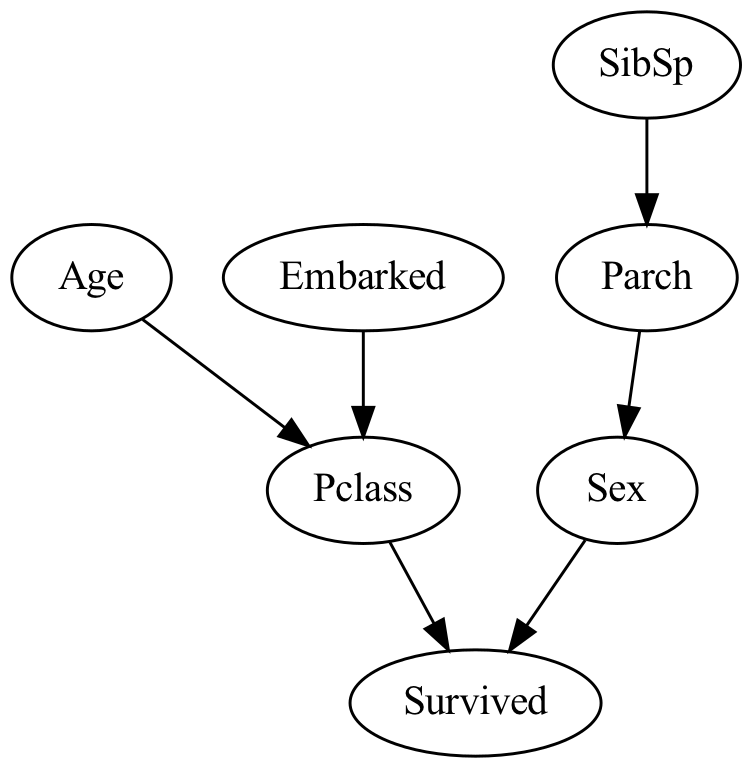

In [17]:
from IPython.display import Image, display
display(Image(filename="titanic_causal.png"))

# Identify the causal effect

In [18]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()


In [64]:
# III. Estimate the target estimand using a statistical method.

In [20]:
# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")



# estimate2 = model.estimate_effect(identified_estimand,
#                                  method_name="backdoor.propensity_score_weighting")


# estimate3 = model.estimate_effect(identified_estimand,
#                                  method_name="backdoor.propensity_score_stratification")



Exception: No common causes/confounders present. Propensity score based methods are not applicable